# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import *
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Importing the data set

In [2]:
df = pd.read_csv(r'C:\Users\gopin\Desktop\Python Basics\Capstone Project\Airbnb_Open_Data.csv',low_memory=False)

# reading the dataframe

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# checking the shape of the data frame
df.shape

(102599, 26)

In [5]:
# reading the column names in dataframe
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
# reading the data types present in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Data Cleaning

In [7]:
#As we see that the column names are randomly named we are converting as per name convention
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [9]:
# checking for null values in df
df.isna().sum().sort_values(ascending=True)

id                                     0
room_type                              0
host_id                                0
long                                   8
lat                                    8
neighbourhood                         16
neighbourhood_group                   29
cancellation_policy                   76
instant_bookable                     105
country_code                         131
number_of_reviews                    183
construction_year                    214
price                                247
name                                 250
service_fee                          273
host_identity_verified               289
calculated_host_listings_count       319
review_rate_number                   326
host_name                            406
minimum_nights                       409
availability_365                     448
country                              532
reviews_per_month                  15879
last_review                        15893
house_rules     

In [10]:
# we see that the license and house rules column has more null values so we remove it as it has no importance in the analysis
df.drop(columns=["license","house_rules"],inplace=True)

In [11]:
df.nunique()

id                                102058
name                               61281
host_id                           102057
host_identity_verified                 2
host_name                          13190
neighbourhood_group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country_code                           1
instant_bookable                       2
cancellation_policy                    3
room_type                              4
construction_year                     20
price                               1151
service_fee                          231
minimum_nights                       153
number_of_reviews                    476
last_review                         2477
reviews_per_month                   1016
review_rate_number                     5
calculated_host_listings_count        78
availability_365                     438
dtype: int64

In [12]:
# From the above we are able to see that the country and country code has just 1 unique values also the columns lat, long,
# last_review and id is of no importance in the analysis so can remove that also
df.drop(columns=["country","country_code","lat","long","id",'last_review'],inplace=True)

In [13]:
df.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [14]:
df.shape

(102599, 18)

In [15]:
# Here the response variable is having null values so we are dropping the records in response variable which has null values
df.dropna(subset=['price'],inplace=True)

In [16]:
# Removing dollar sign and comma from 'price' and 'service_fee' columns
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['service_fee'] = df['service_fee'].replace({'\$': '', ',': ''}, regex=True)

In [17]:
# Converting 'price' and 'service_fee' columns to numeric
df['price'] = pd.to_numeric(df['price']).astype(float)
df['service_fee'] = pd.to_numeric(df['service_fee']).astype(float)

In [18]:
# Checking to see if the changes have taken place effectively
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102352 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            102105 non-null  object 
 1   host_id                         102352 non-null  int64  
 2   host_identity_verified          102067 non-null  object 
 3   host_name                       101951 non-null  object 
 4   neighbourhood_group             102324 non-null  object 
 5   neighbourhood                   102337 non-null  object 
 6   instant_bookable                102252 non-null  object 
 7   cancellation_policy             102281 non-null  object 
 8   room_type                       102352 non-null  object 
 9   construction_year               102142 non-null  float64
 10  price                           102352 non-null  float64
 11  service_fee                     102113 non-null  float64
 12  minimum_nights  

In [19]:
#Checking the shape of df before duplicate removal
df.shape

(102352, 18)

In [20]:
# removing duplicate records
df.drop_duplicates(inplace=True)

In [21]:
#Checking the shape of df after duplicate removal
df.shape

(101811, 18)

In [22]:
df.isna().sum().sort_values(ascending=True)

room_type                             0
host_id                               0
price                                 0
neighbourhood                        15
neighbourhood_group                  28
cancellation_policy                  71
instant_bookable                    100
number_of_reviews                   183
construction_year                   210
service_fee                         239
name                                247
host_identity_verified              285
review_rate_number                  319
calculated_host_listings_count      319
host_name                           399
minimum_nights                      400
availability_365                    448
reviews_per_month                 15791
dtype: int64

In [23]:
# Filling missing values based on data types of columns
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna("Unknown", inplace=True)  # For object columns, fill missing values with 'Unknown'
    else:
        df[i].fillna(0,inplace=True)

In [24]:
df.isna().sum()

name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101811 entries, 0 to 102057
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            101811 non-null  object 
 1   host_id                         101811 non-null  int64  
 2   host_identity_verified          101811 non-null  object 
 3   host_name                       101811 non-null  object 
 4   neighbourhood_group             101811 non-null  object 
 5   neighbourhood                   101811 non-null  object 
 6   instant_bookable                101811 non-null  object 
 7   cancellation_policy             101811 non-null  object 
 8   room_type                       101811 non-null  object 
 9   construction_year               101811 non-null  float64
 10  price                           101811 non-null  float64
 11  service_fee                     101811 non-null  float64
 12  minimum_nights  

# Exploratory Data Analysis

In [26]:
df.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [27]:
# Here we are checking for the unique value counts in host identity
df['host_identity_verified'].value_counts()

unconfirmed    50831
verified       50695
Unknown          285
Name: host_identity_verified, dtype: int64

In [28]:
# Here we are checking for the unique value counts in neighbourhood group
df['neighbourhood_group'].value_counts()

Manhattan        43447
Brooklyn         41537
Queens           13164
Bronx             2687
Staten Island      946
Unknown             28
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [29]:
# Since we have mispelled city names we are regrouping them correctly
correct = {'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'}
df['neighbourhood_group'] = df['neighbourhood_group'].replace(correct)

In [30]:
#Checking for correct value counts in neighbourhood group
df['neighbourhood_group'].value_counts()

Manhattan        43448
Brooklyn         41538
Queens           13164
Bronx             2687
Staten Island      946
Unknown             28
Name: neighbourhood_group, dtype: int64

In [31]:
# Listing and counting various neighbourhood
df['neighbourhood'].value_counts()

Bedford-Stuyvesant        7882
Williamsburg              7713
Harlem                    5431
Bushwick                  4940
Hell's Kitchen            3945
                          ... 
Rossville                    3
Woodrow                      3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 225, dtype: int64

In [32]:
#Checking for correct value counts in instant_bookable
df['instant_bookable'].value_counts()

False      51066
True       50645
Unknown      100
Name: instant_bookable, dtype: int64

In [33]:
#Checking for correct value counts in cancellation_policy
df['cancellation_policy'].value_counts()

moderate    34085
strict      33847
flexible    33808
Unknown        71
Name: cancellation_policy, dtype: int64

In [34]:
# Listing and counting various room types
room_type_count = df['room_type'].value_counts()
print("Count of Various Room Types Available:")
print(room_type_count)

Count of Various Room Types Available:
Entire home/apt    53296
Private room       46200
Shared room         2200
Hotel room           115
Name: room_type, dtype: int64


In [35]:
# Checking which room type folloows more strict cancellation policy
strict_cancellation = df.groupby('room_type')['cancellation_policy'].value_counts().groupby(level=0).head(1)
print("Room type with the most strict cancellation policy:")
print(strict_cancellation)

Room type with the most strict cancellation policy:
room_type        cancellation_policy
Entire home/apt  flexible               17786
Hotel room       flexible                  44
Private room     moderate               15537
Shared room      strict                   734
Name: cancellation_policy, dtype: int64


In [36]:
# Checking the prices by neighborhood group and checking which is the most expensive neighborhood group for rentals
neighborhood_avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood group:")
print(neighborhood_avg_price)

Average price per neighborhood group:
neighbourhood_group
Unknown          658.357143
Queens           630.217031
Bronx            627.764793
Brooklyn         626.500843
Staten Island    623.990486
Manhattan        622.647187
Name: price, dtype: float64


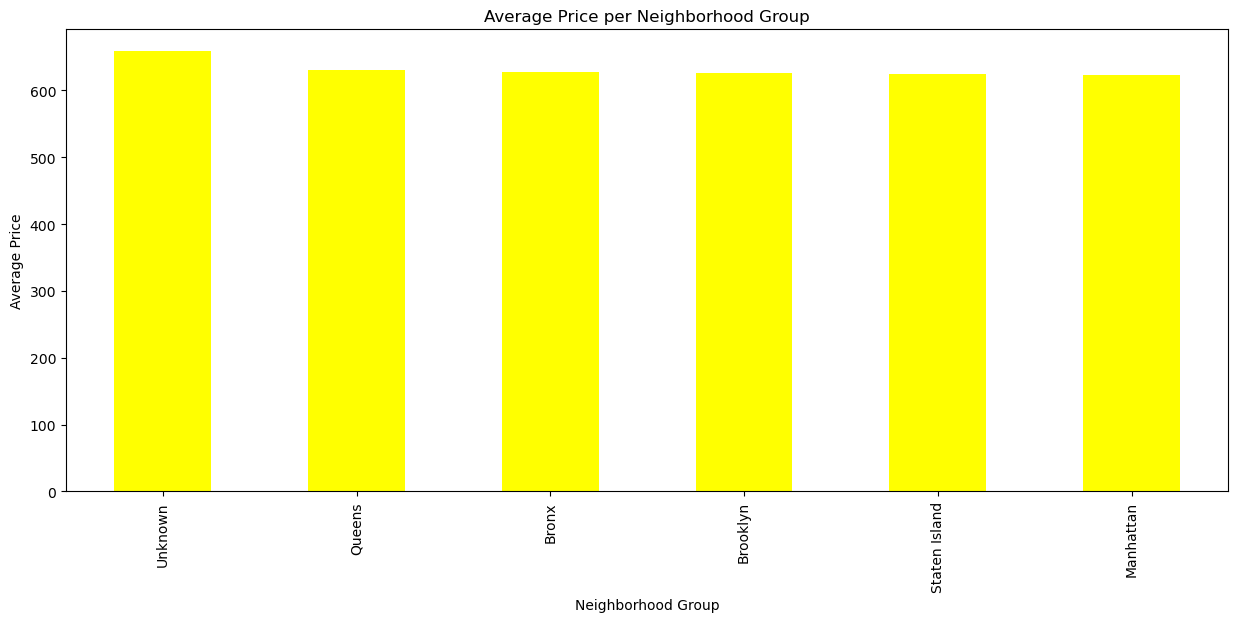

In [37]:
# Plotting average price per neighborhood group
plt.figure(figsize=(15, 6))
neighborhood_avg_price.plot(kind='bar', color='Yellow')
plt.title('Average Price per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()

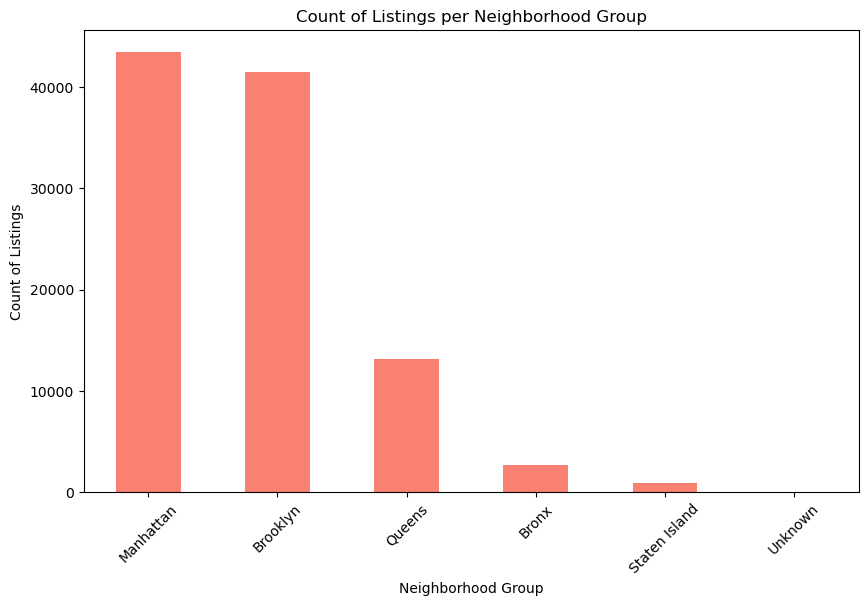

In [38]:
# Counting the Listings per Neighborhood Group
plt.figure(figsize=(10, 6))
df['neighbourhood_group'].value_counts().plot(kind='bar', color='salmon')
plt.title('Count of Listings per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Room Type with More Strict Cancellation Policy
strict_cancellation = df.groupby('room_type')['cancellation_policy'].value_counts().unstack()
print("Room type with the most strict cancellation policy:")
print(strict_cancellation)

Room type with the most strict cancellation policy:
cancellation_policy  Unknown  flexible  moderate   strict
room_type                                                
Entire home/apt         45.0   17786.0   17781.0  17684.0
Hotel room               NaN      44.0      37.0     34.0
Private room            23.0   15245.0   15537.0  15395.0
Shared room              3.0     733.0     730.0    734.0


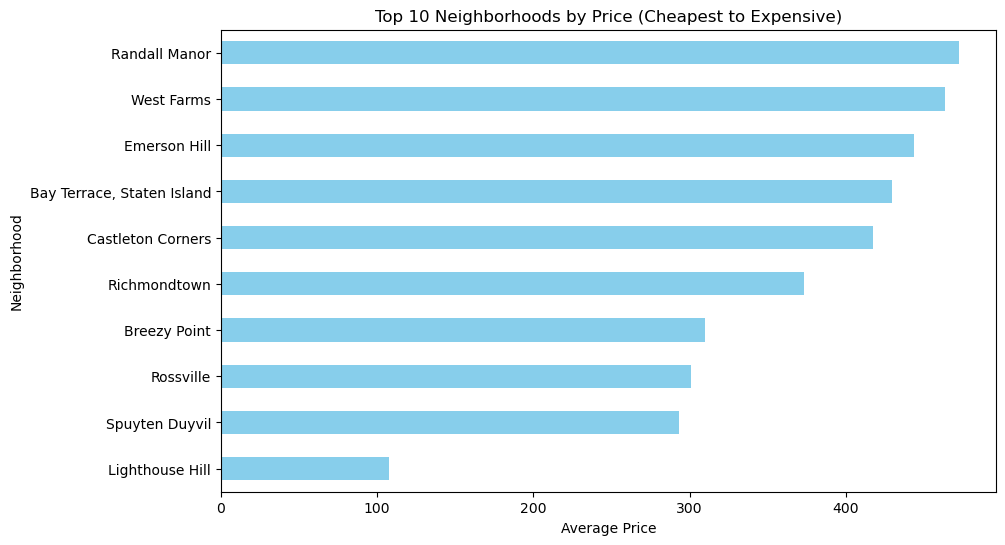

In [40]:
# List the top 10 neighborhoods in increasing order of their price with a horizontal bar graph
top_10_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighborhoods by Price (Cheapest to Expensive)')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

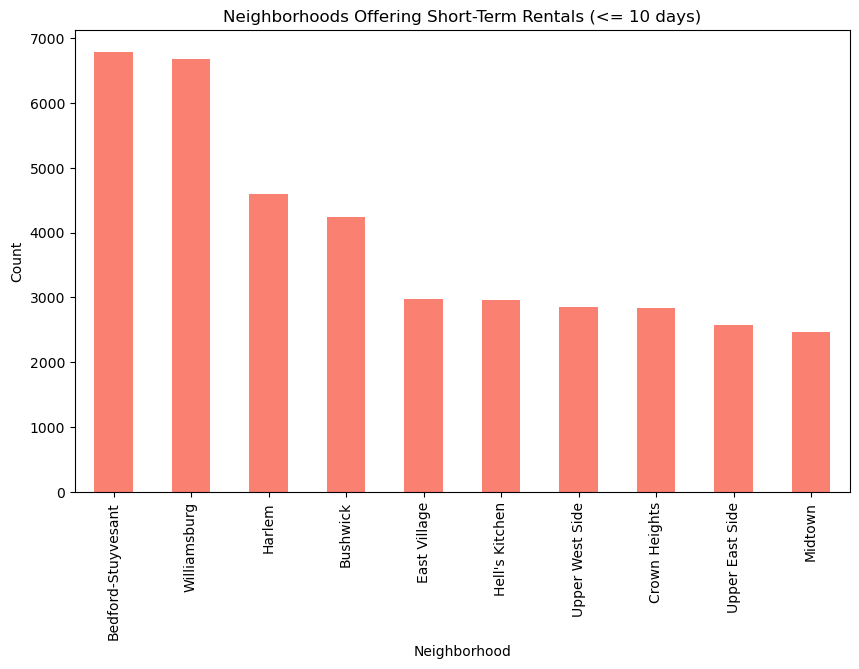

In [41]:
# List the neighborhoods offering short-term rentals within 10 days and illustrate with a bar graph
short_term_rentals = df[df['minimum_nights'] <= 10]['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(10, 6))
short_term_rentals.plot(kind='bar', color='salmon')
plt.title('Neighborhoods Offering Short-Term Rentals (<= 10 days)')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

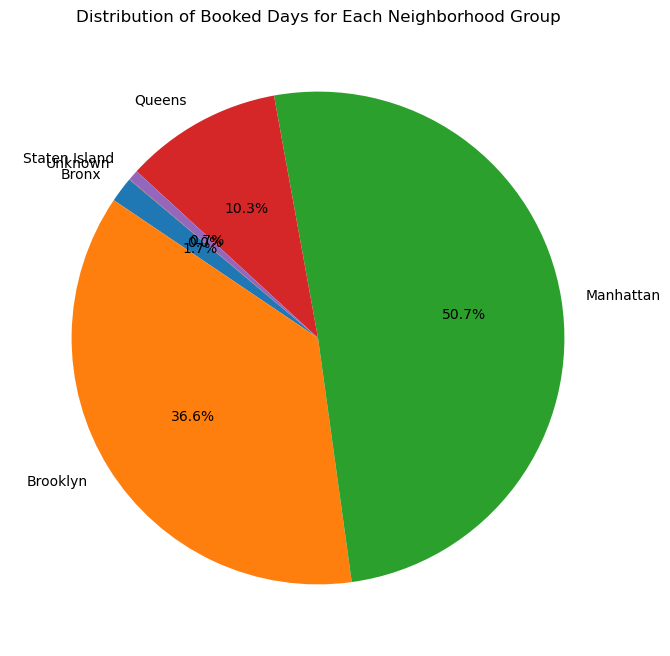

In [42]:
# Create a pie chart showing the distribution of booked days for each neighborhood group
booking_days = df.groupby('neighbourhood_group')['minimum_nights'].sum()
plt.figure(figsize=(8, 8))
pie_chart = booking_days.plot(kind='pie', autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Booked Days for Each Neighborhood Group')
plt.ylabel('')
plt.show()

,Neighbourhood Group,Max Number of Reviews
0,Bronx,450.0
1,Brooklyn,679.0
2,Manhattan,1024.0
3,Queens,698.0
4,Staten Island,387.0
5,Unknown,375.0
6,Missing Neighborhoods,NaN


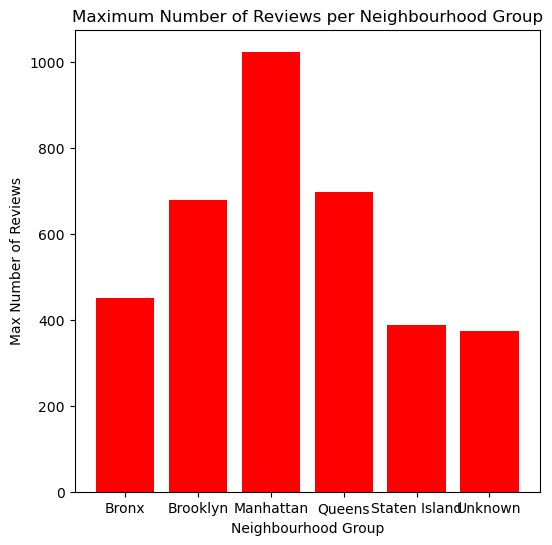

In [43]:
max_reviews_per_group = df.groupby('neighbourhood_group')['number_of_reviews'].max()
max_reviews_missing = df[df['neighbourhood_group'].isna()]['number_of_reviews'].max()

data = pd.DataFrame({
    'Neighbourhood Group': max_reviews_per_group.index,
    'Max Number of Reviews': max_reviews_per_group.values
})

missing_neighborhood_data = pd.DataFrame({
    'Neighbourhood Group': 'Missing Neighborhoods',
    'Max Number of Reviews': max_reviews_missing
}, index=[0])

data = pd.concat([data, missing_neighborhood_data], ignore_index=True)

display(data)

# Create a bar plot for maximum number of reviews per neighborhood group
plt.figure(figsize=(6, 6))
plt.bar(data['Neighbourhood Group'], data['Max Number of Reviews'], color='Red')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Max Number of Reviews')
plt.title('Maximum Number of Reviews per Neighbourhood Group')
plt.show()

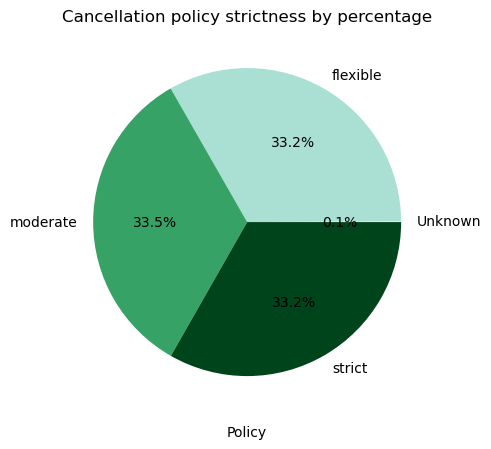

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
policy = df.groupby('cancellation_policy')['host_id'].count().plot(
    kind='pie', autopct='%1.1f%%', colormap='BuGn'
).set(title='Cancellation policy strictness by percentage', xlabel='Policy', ylabel=None)
plt.show()

# Model Building

In [45]:
# Checking the data type before processing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101811 entries, 0 to 102057
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            101811 non-null  object 
 1   host_id                         101811 non-null  int64  
 2   host_identity_verified          101811 non-null  object 
 3   host_name                       101811 non-null  object 
 4   neighbourhood_group             101811 non-null  object 
 5   neighbourhood                   101811 non-null  object 
 6   instant_bookable                101811 non-null  object 
 7   cancellation_policy             101811 non-null  object 
 8   room_type                       101811 non-null  object 
 9   construction_year               101811 non-null  float64
 10  price                           101811 non-null  float64
 11  service_fee                     101811 non-null  float64
 12  minimum_nights  

In [46]:
# Checking for null values so that we can proceed with model biuldinf
df.isna().sum()

name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [47]:
#Check for unique values
df.nunique()

name                               61136
host_id                           101810
host_identity_verified                 3
host_name                          13177
neighbourhood_group                    6
neighbourhood                        225
instant_bookable                       3
cancellation_policy                    4
room_type                              4
construction_year                     21
price                               1151
service_fee                          232
minimum_nights                       154
number_of_reviews                    476
reviews_per_month                   1017
review_rate_number                     6
calculated_host_listings_count        79
availability_365                     438
dtype: int64

In [48]:
#One hot encoding for instant bookable column
coded_value = {'TRUE': 1,
    'FALSE': 0, 'Unknown':3}
df['instant_bookable'] = pd.to_numeric(df['instant_bookable'].replace(coded_value)).astype(float)

In [49]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [50]:
#assigning price to new price coulumn
df['new_price'] = df['price']

In [51]:
#Dropping price column post assignment
df.drop(columns=['price'],inplace=True)

In [52]:
df.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'new_price'],
      dtype='object')

In [53]:
#assigning x and y values
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [54]:
#checking the shape of x and y 
x.shape,y.shape

((101811, 17), (101811,))

In [55]:
#splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=49)

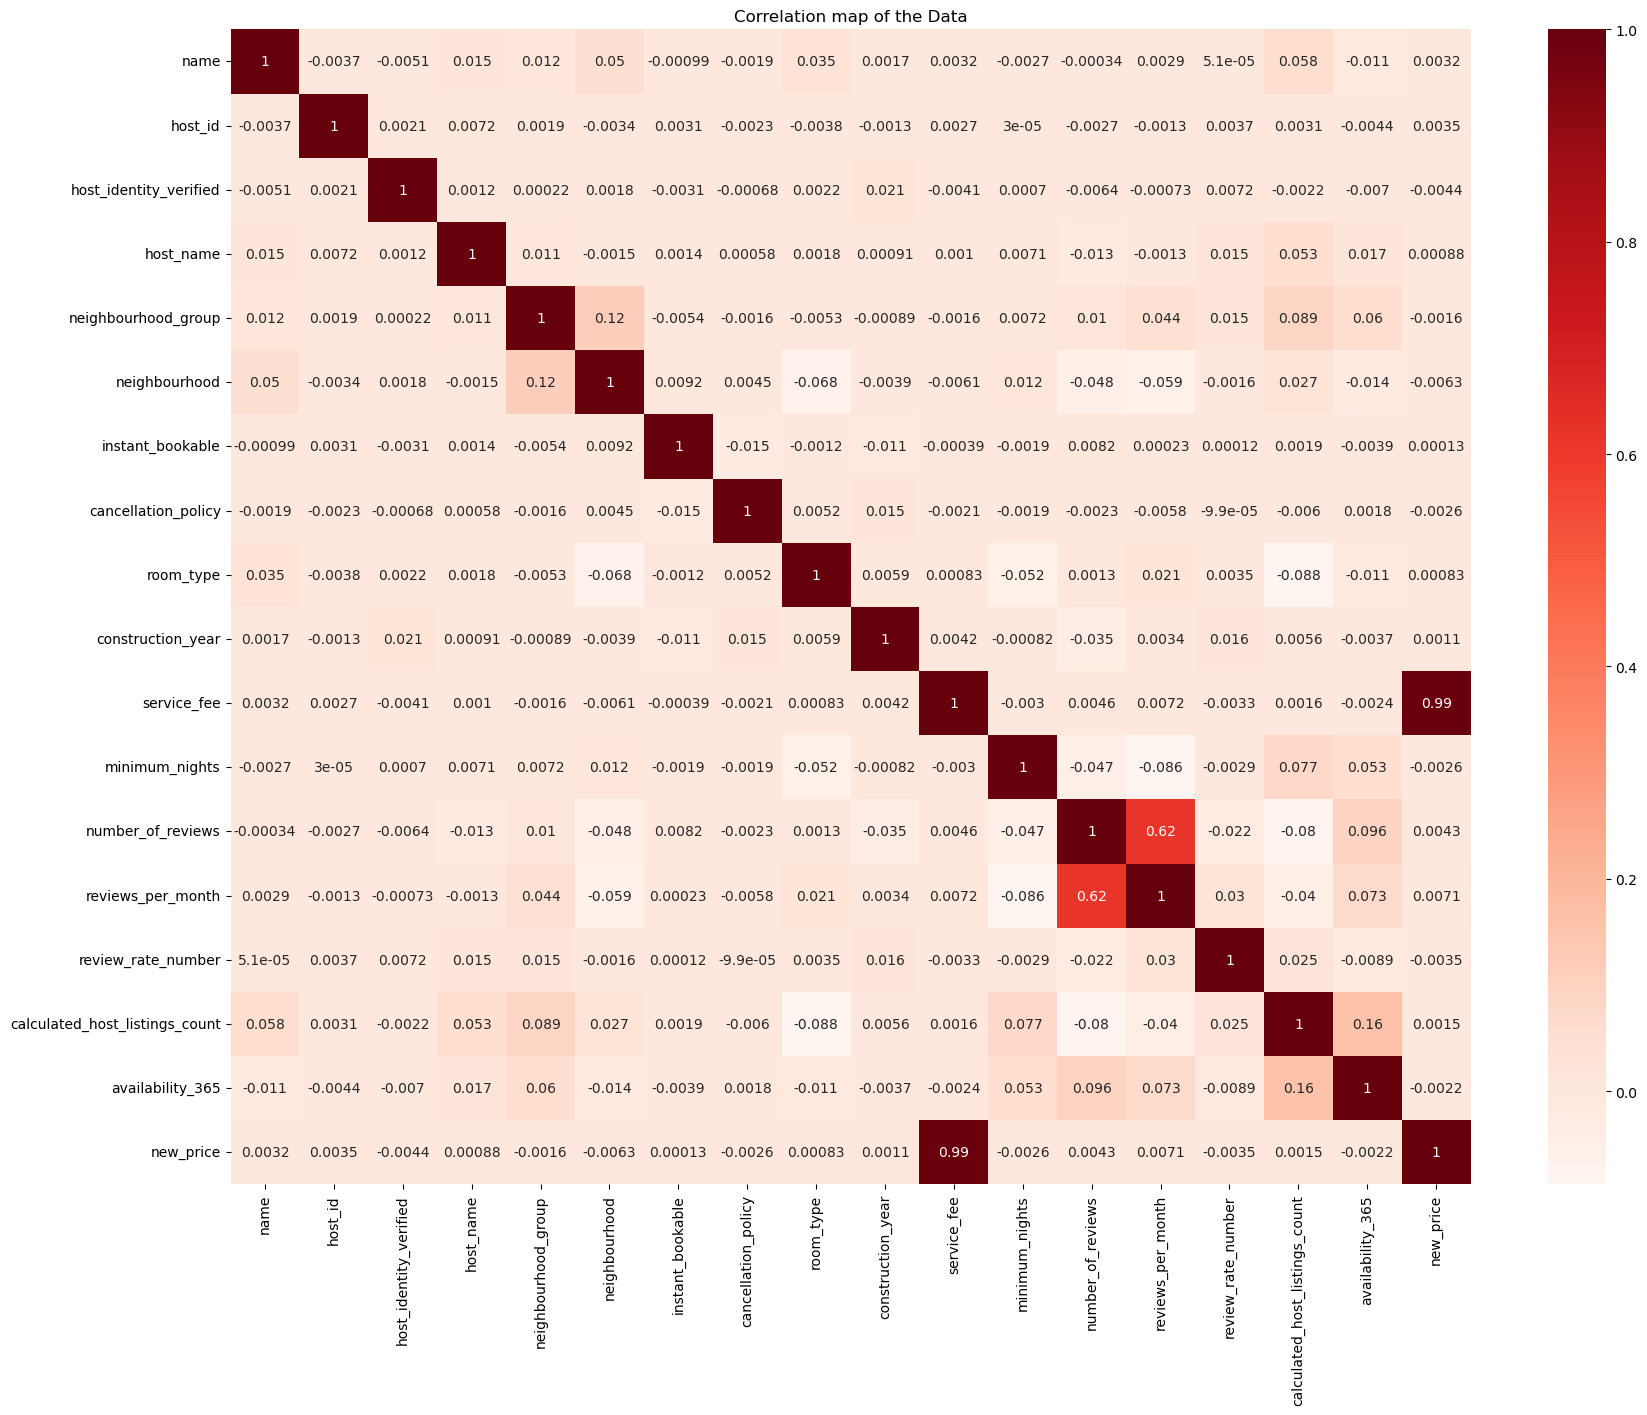

In [56]:
# Linearity check:
plt.figure(figsize=(20,15))
sns.heatmap(pd.concat([x_train,y_train],axis=1).corr(),annot=True,cmap='Reds')
plt.title('Correlation map of the Data',x=0.5,y=1)
plt.show()

In [57]:
#Checking for correlation
def correlation(df,target):
    var_1,var_2,conclusion,p_value,corr_value = [],[],[],[],[]
    result_df = pd.DataFrame()
    for i in  df.columns:
        corr = pearsonr(df[i],target)
        var_1.append(i)
        var_2.append(target.name)
        corr_value.append(corr[0])
        p_value.append(corr[1])
        if corr[1]<0.05:
            conclusion.append('Significant')
        else:
            conclusion.append('In-Significant')
    result_df['ind_var'] = var_1
    result_df['dep_var'] = var_2
    result_df['corr_value'] = corr_value
    result_df['p_value'] = p_value
    result_df['conclusion'] = conclusion
    return result_df

In [58]:
correlation(x_train,y_train)

,ind_var,dep_var,corr_value,p_value,conclusion
0,name,new_price,0.003227,0.372538,In-Significant
1,host_id,new_price,0.003475,0.336966,In-Significant
2,host_identity_verified,new_price,-0.004360,0.228242,In-Significant
3,host_name,new_price,0.000877,0.808503,In-Significant
4,neighbourhood_group,new_price,-0.001628,0.652833,In-Significant
5,neighbourhood,new_price,-0.006306,0.081410,In-Significant
6,instant_bookable,new_price,0.000133,0.970688,In-Significant
7,cancellation_policy,new_price,-0.002555,0.480143,In-Significant
8,room_type,new_price,0.000835,0.817600,In-Significant
9,construction_year,new_price,0.001149,0.750882,In-Significant


In [59]:
#User defined function for Normality check 
def normality_check(df,variable):
    test_name = []
    conclusion = []
    var = []
    result_df = pd.DataFrame()
    for i in ['kstest','shapiro','anderson']:
        if i == 'kstest':
            test_name.append('Kolmogorov Smirnov test')
            var.append(variable)
            ks = kstest(df[variable],'norm')
            if ks[1]<0.05:
                conclusion.append('Non_normal')
            else:
                conclusion.append('Normal')
        elif i == 'shapiro':
            test_name.append('Shapiro Wilk test')
            var.append(variable)
            sha = shapiro(df[variable])
            if sha[1]<0.05:
                conclusion.append('Non_normal')
            else:
                conclusion.append('Normal')
        elif i == 'anderson':
            test_name.append('Anderson Darling test')
            var.append(variable)
            an = anderson(df[variable],'norm')
            if an[0]<an[1][2]:
                conclusion.append('Non_normal')
            else:
                conclusion.append('Normal')
        
    result_df['Variable'] = var
    result_df['Test_Name'] = test_name
    result_df['Conclusion'] = conclusion
    return result_df

In [60]:
normality_check(pd.DataFrame(y_train,columns=[y_train.name]),y_train.name)

C:\Users\gopin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Variable,Test_Name,Conclusion
0,new_price,Kolmogorov Smirnov test,Non_normal
1,new_price,Shapiro Wilk test,Non_normal
2,new_price,Anderson Darling test,Normal


In [61]:
# From the above we see that there might be non-normal in of the response variable so we are to do boxcox transformation 
#to check for the same

In [62]:
from scipy.stats import boxcox

In [63]:
df['new_price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: new_price, Length: 101811, dtype: float64

In [64]:
trans_y,lambda_val = boxcox(df['new_price'])

In [65]:
trans_y

array([209.51193819,  50.31009804, 150.96076814, ..., 106.44193014,
       190.29362011, 234.90859237])

In [66]:
lambda_val

0.7334770671980549

In [67]:
df['trans_new_price']=trans_y

In [68]:
#normality check for transformed response variable 
normality_check(df,'trans_new_price')

C:\Users\gopin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Variable,Test_Name,Conclusion
0,trans_new_price,Kolmogorov Smirnov test,Non_normal
1,trans_new_price,Shapiro Wilk test,Non_normal
2,trans_new_price,Anderson Darling test,Normal


In [69]:
#From the above it still shows the response variable is non normal
#So we assume that its passed the normality test

In [70]:
#Retransforming the response variable
def bc_retransform(data,lambda_val):
    return ((data*lambda_val)+1)**(1/lambda_val)

In [71]:
bc_retransform(df['trans_new_price'],lambda_val=lambda_val)

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: trans_new_price, Length: 101811, dtype: float64

In [72]:
df['trans_new_price']

0         209.511938
1          50.310098
2         150.960768
3         102.533867
4          66.038854
             ...    
102053    164.443359
102054    200.311703
102055    106.441930
102056    190.293620
102057    234.908592
Name: trans_new_price, Length: 101811, dtype: float64

In [73]:
#Multicollinearity check for independent variables
def multicollinearity(df):
    result_df = pd.DataFrame()
    vif_value, conclusion, var = [],[], []
    for i in range(df.shape[1]):
        var.append(df.iloc[:,i].name)
        vif = variance_inflation_factor(df.values,i)
        vif_value.append(vif)
        if vif <=5:
            conclusion.append('No Multicollinearity')
        elif (vif >5 ) & (vif <= 10):
            conclusion.append('Moderate Multicollinearity')
        elif (vif >10 ) & (vif <= 50):
            conclusion.append('High Multicollinearity')
        else:
            conclusion.append('Severe Multicollinearity')
    result_df['variable'] = var
    result_df['vif Value'] = vif_value
    result_df['conclusion'] = conclusion
    return result_df

In [74]:
result = multicollinearity(x_train)

In [75]:
result

,variable,vif Value,conclusion
0,name,1.003609,No Multicollinearity
1,host_id,3.951837,No Multicollinearity
2,host_identity_verified,0.988695,No Multicollinearity
3,host_name,0.998738,No Multicollinearity
4,neighbourhood_group,1.019403,No Multicollinearity
5,neighbourhood,1.021674,No Multicollinearity
6,instant_bookable,0.997664,No Multicollinearity
7,cancellation_policy,0.991937,No Multicollinearity
8,room_type,1.015602,No Multicollinearity
9,construction_year,0.083357,No Multicollinearity


In [76]:
#From the above we conclude that the independent variable has no multicollinearity

In [77]:
df

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,new_price,trans_new_price
0,15748,80014485718,1,7418,1,111,0.0,3,2,2020.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,966.0,209.511938
1,47813,52335172823,2,5489,2,130,0.0,2,0,2007.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,142.0,50.310098
2,55226,78829239556,0,3335,2,97,1.0,1,2,2005.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,620.0,150.960768
3,57457,85098326012,1,4060,1,42,1.0,2,0,2005.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0,368.0,102.533867
4,23683,92037596077,2,7355,2,62,0.0,2,0,2009.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,204.0,66.038854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,20316,77326652202,1,7679,1,75,1.0,2,2,0.0,0.0,7.0,12.0,0.44,5.0,1.0,0.0,696.0,164.443359
102054,41982,45936254757,2,12056,1,28,0.0,1,2,0.0,0.0,1.0,19.0,0.72,3.0,2.0,0.0,909.0,200.311703
102055,41190,23801060917,2,8159,1,13,1.0,2,0,0.0,0.0,2.0,50.0,3.12,4.0,2.0,235.0,387.0,106.441930
102056,46098,15593031571,1,11002,2,97,1.0,3,2,0.0,0.0,2.0,0.0,0.00,1.0,1.0,0.0,848.0,190.293620


In [78]:
#dropping the unwanted columns
df.drop(columns='trans_new_price',inplace=True)

In [79]:
df

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,new_price
0,15748,80014485718,1,7418,1,111,0.0,3,2,2020.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,966.0
1,47813,52335172823,2,5489,2,130,0.0,2,0,2007.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,142.0
2,55226,78829239556,0,3335,2,97,1.0,1,2,2005.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,620.0
3,57457,85098326012,1,4060,1,42,1.0,2,0,2005.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0,368.0
4,23683,92037596077,2,7355,2,62,0.0,2,0,2009.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,20316,77326652202,1,7679,1,75,1.0,2,2,0.0,0.0,7.0,12.0,0.44,5.0,1.0,0.0,696.0
102054,41982,45936254757,2,12056,1,28,0.0,1,2,0.0,0.0,1.0,19.0,0.72,3.0,2.0,0.0,909.0
102055,41190,23801060917,2,8159,1,13,1.0,2,0,0.0,0.0,2.0,50.0,3.12,4.0,2.0,235.0,387.0
102056,46098,15593031571,1,11002,2,97,1.0,3,2,0.0,0.0,2.0,0.0,0.00,1.0,1.0,0.0,848.0


## Linear Regression

In [80]:
lr = LinearRegression()

In [81]:
#fitting the model
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
#predicting the results for known values
y_pred = lr.predict(x_train)

In [83]:
df

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,new_price
0,15748,80014485718,1,7418,1,111,0.0,3,2,2020.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,966.0
1,47813,52335172823,2,5489,2,130,0.0,2,0,2007.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,142.0
2,55226,78829239556,0,3335,2,97,1.0,1,2,2005.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,620.0
3,57457,85098326012,1,4060,1,42,1.0,2,0,2005.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0,368.0
4,23683,92037596077,2,7355,2,62,0.0,2,0,2009.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,20316,77326652202,1,7679,1,75,1.0,2,2,0.0,0.0,7.0,12.0,0.44,5.0,1.0,0.0,696.0
102054,41982,45936254757,2,12056,1,28,0.0,1,2,0.0,0.0,1.0,19.0,0.72,3.0,2.0,0.0,909.0
102055,41190,23801060917,2,8159,1,13,1.0,2,0,0.0,0.0,2.0,50.0,3.12,4.0,2.0,235.0,387.0
102056,46098,15593031571,1,11002,2,97,1.0,3,2,0.0,0.0,2.0,0.0,0.00,1.0,1.0,0.0,848.0


In [84]:
#Cheking the predicted values
y_pred

array([904.11085315, 135.9759509 , 661.29904213, ..., 433.71307311,
       611.60768375, 933.65453086])

In [85]:
#Since there is a slight variation in predicting known result we do standard scaling 

In [86]:
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = pd.DataFrame(sc.transform(x_train),columns=x_train.columns)

In [87]:
x_train_scaled

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,-0.785627,0.208558,-0.979073,-1.499044,-0.899179,-0.809196,-0.989428,0.002679,0.998470,-0.037065,0.845498,-0.217661,-0.511805,-0.588890,0.563912,-0.215235,-1.037767
1,-1.246704,-0.067050,0.999282,0.252630,-0.899179,1.210064,0.985290,-1.222171,-0.942472,0.017848,-1.483523,-0.217661,-0.531950,-0.618589,-0.207855,-0.090710,0.251484
2,-1.212349,0.896357,-0.979073,0.778536,0.406483,1.396237,-0.989428,0.002679,-0.942472,-0.059030,0.109227,0.658161,-0.471514,-0.630468,0.563912,0.002684,0.325578
3,0.559112,-0.985666,-0.979073,0.556846,0.406483,-0.164751,0.985290,-1.222171,0.998470,-0.059030,-0.581966,0.658161,-0.048457,-0.499793,1.335679,-0.184104,-0.563560
4,1.710360,-0.006918,0.999282,0.658791,-0.899179,1.568089,-0.989428,1.227528,-0.942472,-0.026082,-0.116162,-0.187461,-0.411077,-0.582950,-0.979622,-0.215235,1.029479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,0.697271,1.083932,0.999282,1.050389,-0.899179,-1.367715,0.985290,1.227528,0.998470,0.149639,0.484875,-0.187461,-0.552096,-0.689866,-0.207855,-0.215235,-1.037767
76354,1.352916,-1.326643,0.999282,0.528798,-0.899179,-1.367715,-0.989428,-1.222171,0.998470,-0.015100,-0.792329,-0.217661,-0.531950,-0.642348,-0.979622,-0.215235,-1.037767
76355,-0.352555,0.919548,0.999282,-1.446183,-0.899179,1.568089,0.985290,-1.222171,-0.942472,0.017848,-0.581966,-0.187461,-0.370786,-0.297840,-0.979622,-0.215235,-0.148629
76356,1.260904,0.691013,-0.979073,0.508571,-0.899179,1.568089,-0.989428,-1.222171,-0.942472,0.105709,-0.041033,-0.187461,-0.431223,0.129826,1.335679,-0.184104,-1.037767


In [88]:
lr = LinearRegression()

In [89]:
#Fitting the transformed value
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [90]:
#predicting the scaled values
y_pred = lr.predict(x_train_scaled)

In [91]:
#Cheking the predicted values
y_pred

array([904.11085315, 135.9759509 , 661.29904213, ..., 433.71307311,
       611.60768375, 933.65453086])

In [92]:
#Evaluation metrics for train
mae_train = mean_absolute_error(y_train,lr.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,lr.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,lr.predict(x_train_scaled))
r2 = r2_score(y_train,lr.predict(x_train_scaled))

In [93]:
#Evaluation metrics for test
mae_test = mean_absolute_error(y_test,lr.predict(x_test))
rmse_test = np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))
mape_test = mean_absolute_percentage_error(y_test,lr.predict(x_test))
r2 = r2_score(y_test,lr.predict(x_test))

In [94]:
metrics_train = [rmse_train,mae_train,mape_train,r2]
metrics_test = [rmse_test,mae_test,mape_test,r2]

In [95]:
eval_df = pd.DataFrame()
eval_df['train_metrics'] = metrics_train
eval_df['test_metrics'] = metrics_test
eval_df.index = ['rmse','mae','mape','r2']
eval_df

,train_metrics,test_metrics
rmse,3.571415e+01,1.415346e+10
mae,4.492123e+00,1.225518e+10
mape,1.419689e-02,3.371084e+07
r2,-1.824399e+15,-1.824399e+15


In [96]:
#Since there is a huge variation in evaluation metrics we are to try cross validation

In [97]:
kf= KFold(5)
result=cross_val_score(lr,x_train_scaled,y_train,cv=kf)
result

array([0.98935943, 0.98731347, 0.99024318, 0.98804349, 0.98705646])

In [98]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,lr.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,lr.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,lr.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [99]:
x_test_scaled = pd.DataFrame(sc.fit_transform(x_test),columns=x_test.columns,index = x_test.index)

In [100]:
x_test_pc_sig = x_test_scaled[list(x_test_scaled.columns)]

In [101]:
# Subset x_test_pc_sig to include only the relevant features
x_test_pc_sig_subset = x_test_pc_sig[x_train.columns]

# Predict using the subset of features
y_pred_test = lr.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)


In [102]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [103]:
#Displaying final results
eval_df_linear = pd.DataFrame()
eval_df_linear['train_metrics'] = metrics_train
eval_df_linear['test_metrics'] = metrics_test
eval_df_linear.index = ['mae','rmse','mape','r2']
eval_df_linear

,train_metrics,test_metrics
mae,4.492123,4.192159
rmse,35.714153,37.716809
mape,0.014197,0.012300
r2,0.988412,0.987044


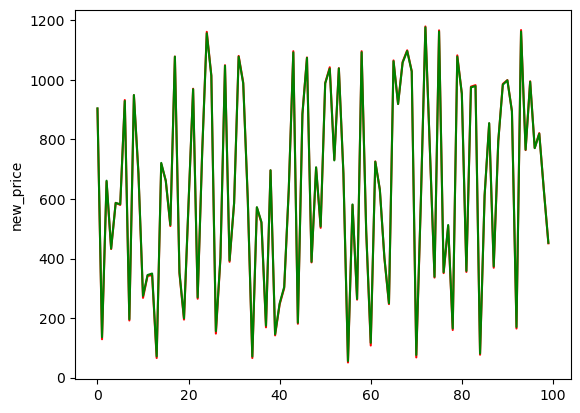

In [104]:
sns.lineplot(x = range(100), y = y_train.iloc[:100], color = 'red')
sns.lineplot(x = range(100), y = y_pred[0:100], color = 'green')
plt.show()

## Ada Boost Regressor

In [105]:
#Create AdaBoost Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)
ada_boost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=0.1, random_state=42)

In [106]:
#Train the Model
ada_boost_regressor.fit(x_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, random_state=42)

In [107]:
#Making Predictions
y_pred = ada_boost_regressor.predict(x_train_scaled)

In [108]:
# Predict using the subset of features
y_pred_test = ada_boost_regressor.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [109]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,ada_boost_regressor.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,ada_boost_regressor.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,ada_boost_regressor.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [110]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [111]:
#Displaying final results
eval_df_ada = pd.DataFrame()
eval_df_ada['train_metrics'] = metrics_train
eval_df_ada['test_metrics'] = metrics_test
eval_df_ada.index = ['mae','rmse','mape','r2']
eval_df_ada

,train_metrics,test_metrics
mae,44.051270,44.121512
rmse,56.351663,57.157356
mape,0.180311,0.180093
r2,0.988412,0.970246


In [112]:
#Fine tuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(AdaBoostRegressor(base_regressor, random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [113]:
best_model

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.01, random_state=42)

In [114]:
#After fine tuning and Creating AdaBoost Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)
ada_boost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=0.01, random_state=42)

In [115]:
#Train the Model
ada_boost_regressor.fit(x_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.01, random_state=42)

In [116]:
#Making Predictions
y_pred = ada_boost_regressor.predict(x_train_scaled)

In [117]:
# Predict using the subset of features
y_pred_test = ada_boost_regressor.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [118]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,ada_boost_regressor.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,ada_boost_regressor.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,ada_boost_regressor.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [119]:
#Displaying final results
eval_df_ada_best = pd.DataFrame()
eval_df_ada_best['train_metrics'] = metrics_train
eval_df_ada_best['test_metrics'] = metrics_test
eval_df_ada_best.index = ['mae','rmse','mape','r2']
eval_df_ada_best

,train_metrics,test_metrics
mae,44.051270,44.121512
rmse,56.351663,57.157356
mape,0.180311,0.180093
r2,0.988412,0.970246


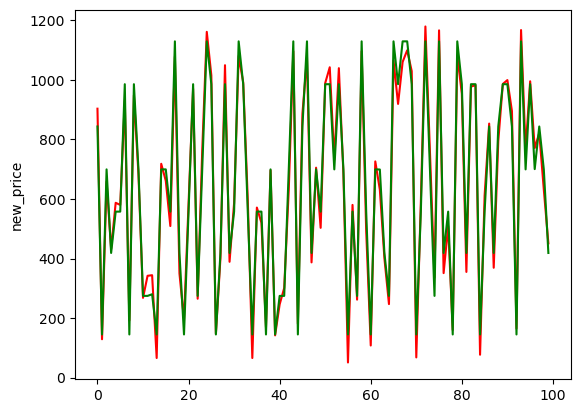

In [120]:
sns.lineplot(x = range(100), y = y_train.iloc[:100], color = 'red')
sns.lineplot(x = range(100), y = y_pred[0:100], color = 'green')
plt.show()

## Regression Tree 

In [121]:
# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [122]:
# Make predictions on the test set
y_pred = regressor.predict(x_train_scaled)

In [123]:
# Predict using the subset of features
y_pred_test = regressor.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [124]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,regressor.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,regressor.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,regressor.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [125]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [126]:
#Displaying final results
eval_df_rg = pd.DataFrame()
eval_df_rg['train_metrics'] = metrics_train
eval_df_rg['test_metrics'] = metrics_test
eval_df_rg.index = ['mae','rmse','mape','r2']
eval_df_rg

,train_metrics,test_metrics
mae,0.000000,2.010568
rmse,0.000000,22.863262
mape,0.000000,0.005828
r2,0.988412,0.995239


In [127]:
#Fine tuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,10]}

grid_search = GridSearchCV(regressor,param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_params_['max_depth']
best_model

7

In [128]:
# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42,max_depth=7)

# Fit the model to the training data
regressor.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [129]:
# Make predictions on the test set
y_pred = regressor.predict(x_train_scaled)

In [130]:
# Predict using the subset of features
y_pred_test = regressor.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [131]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,regressor.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,regressor.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,regressor.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [132]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [133]:
#Displaying final results
eval_df_rg = pd.DataFrame()
eval_df_rg['train_metrics'] = metrics_train
eval_df_rg['test_metrics'] = metrics_test
eval_df_rg.index = ['mae','rmse','mape','r2']
eval_df_rg

,train_metrics,test_metrics
mae,3.191157,3.485299
rmse,14.227854,20.198979
mape,0.011115,0.012439
r2,0.988412,0.996284


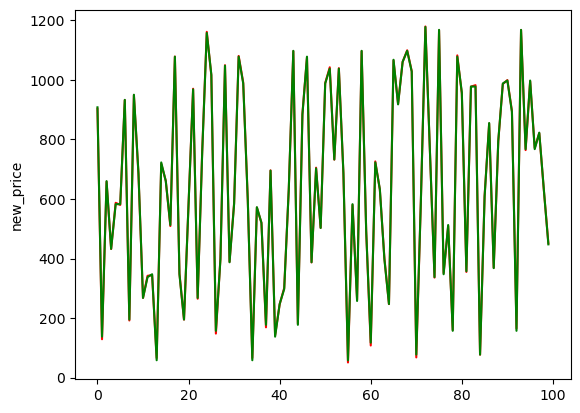

In [134]:
sns.lineplot(x = range(100), y = y_train.iloc[:100], color = 'red')
sns.lineplot(x = range(100), y = y_pred[0:100], color = 'green')
plt.show()



## KNN Regression

In [135]:
# Create and train the KNN regression model.
k_value = 5  # You can choose the appropriate k value based on cross-validation
knn_model = KNeighborsRegressor(n_neighbors=k_value)
knn_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [136]:
# Predict using the subset of features
y_pred_test = knn_model.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [137]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,knn_model.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,knn_model.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,knn_model.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [138]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [139]:
#Displaying final results
eval_df_knn = pd.DataFrame()
eval_df_knn['train_metrics'] = metrics_train
eval_df_knn['test_metrics'] = metrics_test
eval_df_knn.index = ['mae','rmse','mape','r2']
eval_df_knn

,train_metrics,test_metrics
mae,67.600689,81.747723
rmse,87.135681,105.737586
mape,0.218953,0.269389
r2,0.988412,0.898175


## Random Forest

In [141]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [142]:
# Predict using the subset of features
y_pred_test = rf_model.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [143]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,rf_model.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,rf_model.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,rf_model.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [144]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [145]:
#Displaying final results
eval_df_rf = pd.DataFrame()
eval_df_rf['train_metrics'] = metrics_train
eval_df_rf['test_metrics'] = metrics_test
eval_df_rf.index = ['mae','rmse','mape','r2']
eval_df_rf

,train_metrics,test_metrics
mae,0.598736,1.902523
rmse,5.997118,19.838317
mape,0.001753,0.005884
r2,0.988412,0.996416


In [146]:
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [147]:
# Predict using the subset of features
y_pred_test = rf_model.predict(x_test_pc_sig_subset)

#Evaluation metrics for transformed test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)

In [148]:
#Evaluation metrics for transformed train
mae_train = mean_absolute_error(y_train,rf_model.predict(x_train_scaled))
rmse_train = np.sqrt(mean_squared_error(y_train,rf_model.predict(x_train_scaled)))
mape_train = mean_absolute_percentage_error(y_train,rf_model.predict(x_train_scaled))
r2_train = r2_score(y_train,lr.predict(x_train_scaled))

In [149]:
metrics_train = [mae_train,rmse_train,mape_train,r2_train]
metrics_test = [mae_test,rmse_test,mape_test,r2_test]

In [150]:
#Displaying final results
eval_df_rf = pd.DataFrame()
eval_df_rf['train_metrics'] = metrics_train
eval_df_rf['test_metrics'] = metrics_test
eval_df_rf.index = ['mae','rmse','mape','r2']
eval_df_rf

,train_metrics,test_metrics
mae,0.593135,1.888743
rmse,5.922751,19.667108
mape,0.001764,0.005854
r2,0.988412,0.996477
